Use the famous boston dataset and find out if there is multicollinearity or not. If there is multicollinearity try to remove it with help of steps taught in the session.

In [ ]:
## steps ->

# remove the dependent column(y) from the data
# get the condition number    if > 1000 : remove multicollinearity
# make the heatmap             if > +- 0.8 : highly dependent on each other
# do VIF for every column       if > 10 : remove multicollinearity

## multiclollinearity only affects the inference models and dont majorly affect the regression models

In [ ]:
# Link - https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)



In [ ]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
df.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


In [ ]:
# checking using the condition number :
arr = df.drop(columns=['medv']).values
cond_no = np.linalg.cond(arr)
print(cond_no)

8497.936303845774


In [ ]:
# 8497.936303845774 > 1000 hence strong multicollinearity exists

<Axes: >

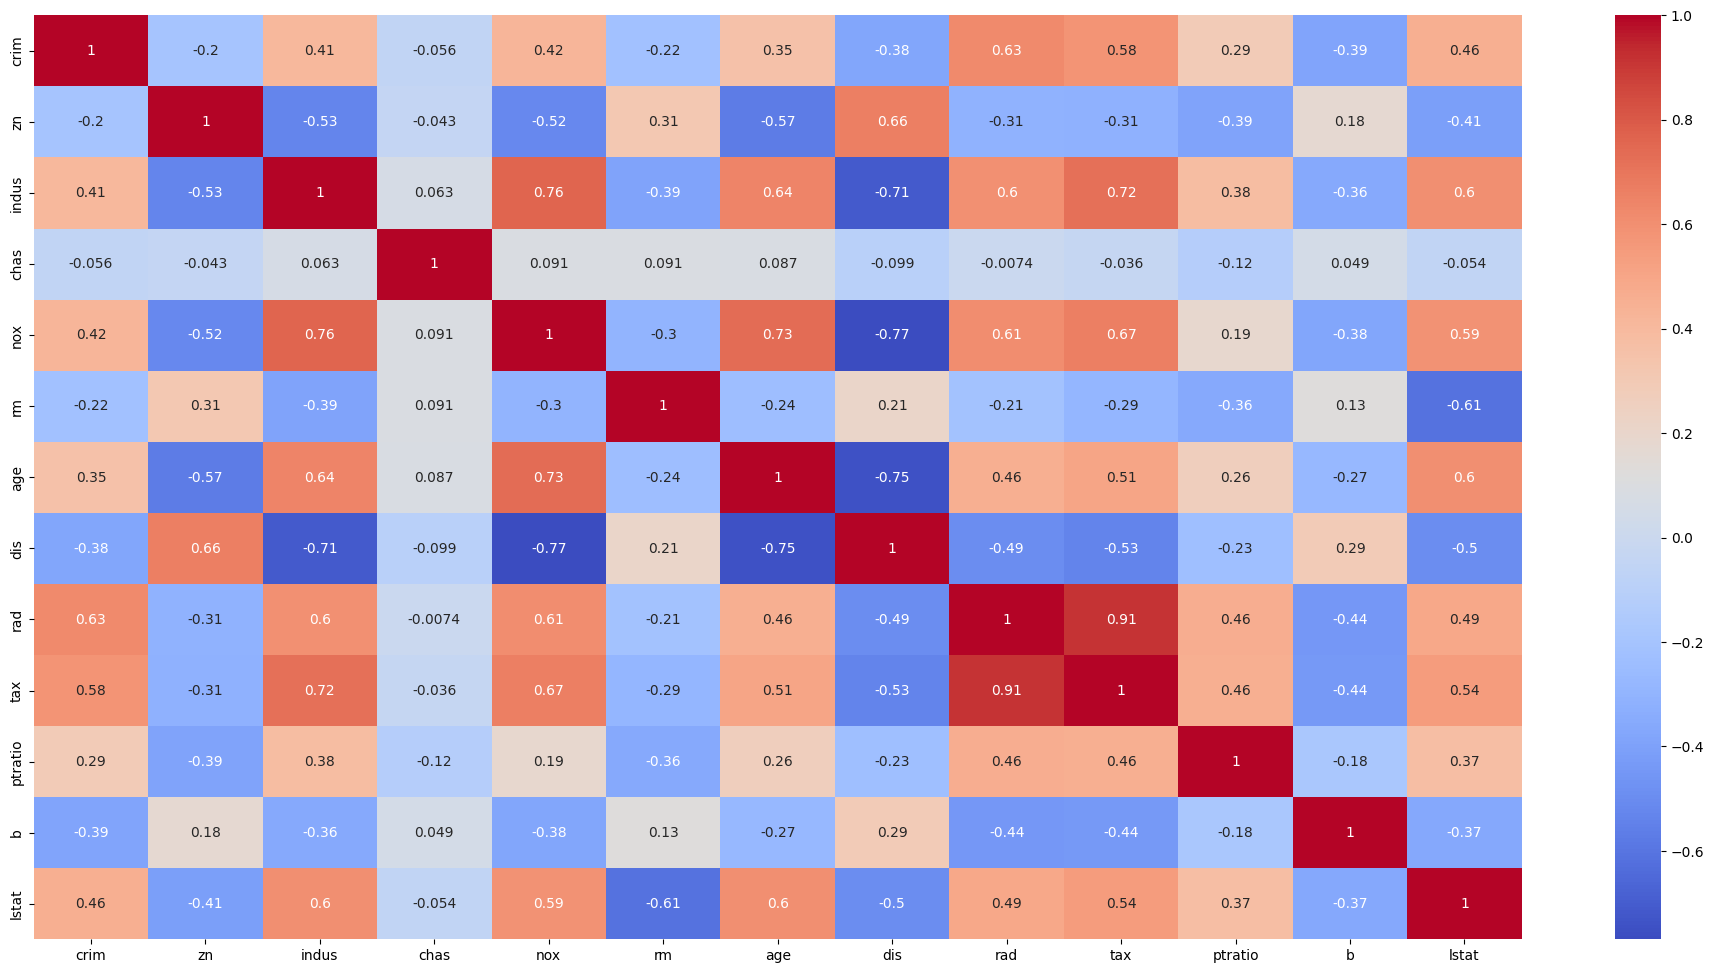

In [ ]:
# checking multicollinearity
plt.figure(figsize=(24, 12))
sns.heatmap(df.drop(columns=['medv']).corr(),annot=True,cmap="coolwarm")


# Treshold : +-0.75

In [ ]:
X = df.drop(columns=['medv']).values
features = df.drop(columns=['medv']).columns

In [ ]:
# checkinig using VIF :
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif = pd.DataFrame({'Feature': features, 'VIF': vif})

print(vif.sort_values(by='VIF',ascending=False))

In [ ]:
vif.sort_values(by='VIF',ascending=False)


,Feature,VIF
10,ptratio,85.029547
5,rm,77.948283
4,nox,73.894947
9,tax,61.227274
6,age,21.386850
11,b,20.104943
8,rad,15.167725
7,dis,14.699652
2,indus,14.485758
12,lstat,11.102025


In [ ]:
# for fixing multicollinearity ridge regression and pca are mostly used